In [1]:
from data.loader import load_segmentation_dataset, load_train_dataset
from models.u2net.model import U2NET, PipelineU2NET
from utils.display import display, DisplayCallback
from utils.metrics import RoundedAccuracy, RoundedMeanIoU, FBetaScore

import matplotlib.pyplot as plt

import numpy as np
import tensorflow as tf
import keras

from keras.metrics import MeanSquaredError, Precision, Recall

tf.debugging.disable_traceback_filtering()

In [2]:
print("Num GPUs Available: ", tf.config.list_physical_devices('GPU'))

Num GPUs Available:  [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


In [3]:
TRAIN_DATASETS = ["DUTS-TR", "DIS5K\DIS-TE1", "DIS5K\DIS-TE2", "DIS5K\DIS-TE3", "DIS5K\DIS-TE4", "DIS5K\DIS-TR", "DIS5K\DIS-VD"]
TEST_PATH = "./datasets/DUTS-TE/"

IMAGE_SHAPE = (320, 320, 3)
MASK_SHAPE = (320, 320, 1)

# Training
BATCH_SIZE = 8
EPOCHS = 100
LEARNING_RATE = 0.001

In [4]:
train_dataset = load_train_dataset(
    dir_path = ["./datasets/{}/".format(i) for i in TRAIN_DATASETS],
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE,
    batch=BATCH_SIZE,
)

test_dataset = load_segmentation_dataset(
    dir_path = TEST_PATH,
    image_shape = IMAGE_SHAPE,
    mask_shape = MASK_SHAPE,
    need_scaling = True
).batch(BATCH_SIZE)

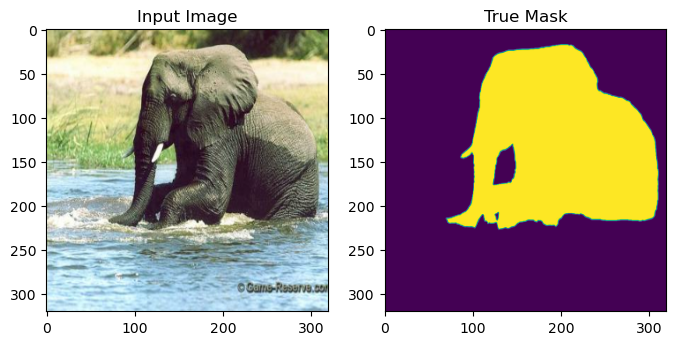

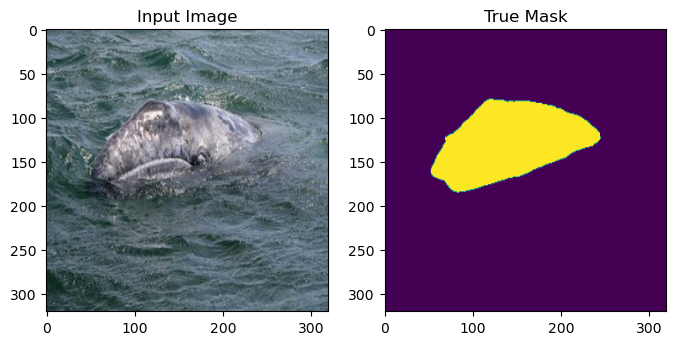

In [5]:
for images, masks in train_dataset.take(2):
  sample_image, sample_mask = images[0], masks[0]
  display([sample_image, sample_mask], ['Input Image', 'True Mask'], figsize=(8, 4))

In [6]:
# Изображение для отладки обучения
for images, masks in test_dataset.take(1):
    test_image_for_display = images[6]
    test_mask_for_display = masks[6]

In [7]:
adam = keras.optimizers.Adam(learning_rate=LEARNING_RATE, beta_1=.9, beta_2=.999, epsilon=1e-08)
bce = keras.losses.BinaryCrossentropy()

model = U2NET()
model.compile(optimizer=adam, loss=bce, metrics=[
    [MeanSquaredError(), Precision(0.5), Recall(0.5), RoundedAccuracy(), RoundedMeanIoU(num_classes=2)]] + [None] * 6)

Epoch 1/100
2003/2003 [==============================] - ETA: 0s - loss: 2.4791 - activation_loss: 0.3532 - activation_1_loss: 0.3281 - activation_2_loss: 0.3583 - activation_3_loss: 0.3546 - activation_4_loss: 0.3602 - activation_5_loss: 0.3586 - activation_6_loss: 0.3661 - activation_accuracy: 0.8185 - activation_mean_squared_error: 0.1097 - activation_rounded_mean_io_u: 0.6360 - activation_precision: 0.7187 - activation_recall: 0.5703

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 1



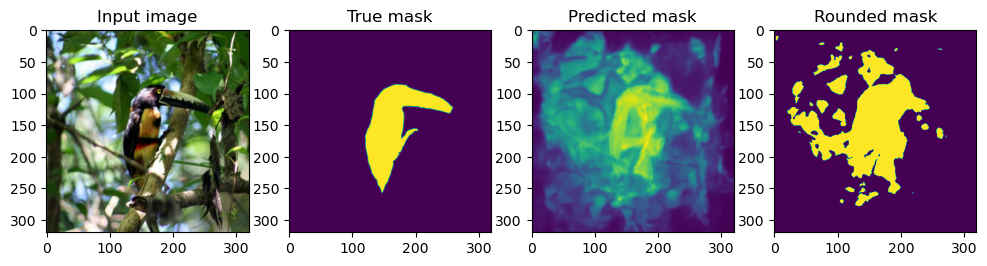

2003/2003 [==============================] - 1142s 558ms/step - loss: 2.4791 - activation_loss: 0.3532 - activation_1_loss: 0.3281 - activation_2_loss: 0.3583 - activation_3_loss: 0.3546 - activation_4_loss: 0.3602 - activation_5_loss: 0.3586 - activation_6_loss: 0.3661 - activation_accuracy: 0.8185 - activation_mean_squared_error: 0.1097 - activation_rounded_mean_io_u: 0.6360 - activation_precision: 0.7187 - activation_recall: 0.5703 - val_loss: 2.3749 - val_activation_loss: 0.3040 - val_activation_1_loss: 0.2986 - val_activation_2_loss: 0.3105 - val_activation_3_loss: 0.3238 - val_activation_4_loss: 0.3325 - val_activation_5_loss: 0.3678 - val_activation_6_loss: 0.4377 - val_activation_accuracy: 0.8557 - val_activation_mean_squared_error: 0.0899 - val_activation_rounded_mean_io_u: 0.5973 - val_activation_precision: 0.6337 - val_activation_recall: 0.4298
Epoch 2/100
2003/2003 [==============================] - ETA: 0s - loss: 1.9359 - activation_loss: 0.2648 - activation_1_loss: 0.265

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1108s 551ms/step - loss: 1.9359 - activation_loss: 0.2648 - activation_1_loss: 0.2655 - activation_2_loss: 0.2693 - activation_3_loss: 0.2786 - activation_4_loss: 0.2772 - activation_5_loss: 0.2845 - activation_6_loss: 0.2961 - activation_accuracy: 0.8658 - activation_mean_squared_error: 0.0793 - activation_rounded_mean_io_u: 0.7250 - activation_precision: 0.8213 - activation_recall: 0.6847 - val_loss: 1.9204 - val_activation_loss: 0.2672 - val_activation_1_loss: 0.2730 - val_activation_2_loss: 0.2712 - val_activation_3_loss: 0.2748 - val_activation_4_loss: 0.2749 - val_activation_5_loss: 0.2774 - val_activation_6_loss: 0.2819 - val_activation_accuracy: 0.8663 - val_activation_mean_squared_error: 0.0799 - val_activation_rounded_mean_io_u: 0.6126 - val_activation_precision: 0.7017 - val_activation_recall: 0.4192
Epoch 3/100
2003/2003 [==============================] - 1063s 529ms/step - loss: 1.7435 - activation_loss: 0.2372 - activation_1_lo

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1105s 550ms/step - loss: 1.6096 - activation_loss: 0.2175 - activation_1_loss: 0.2187 - activation_2_loss: 0.2218 - activation_3_loss: 0.2260 - activation_4_loss: 0.2288 - activation_5_loss: 0.2397 - activation_6_loss: 0.2571 - activation_accuracy: 0.8865 - activation_mean_squared_error: 0.0638 - activation_rounded_mean_io_u: 0.7681 - activation_precision: 0.8536 - activation_recall: 0.7472 - val_loss: 1.7291 - val_activation_loss: 0.2405 - val_activation_1_loss: 0.2499 - val_activation_2_loss: 0.2437 - val_activation_3_loss: 0.2438 - val_activation_4_loss: 0.2438 - val_activation_5_loss: 0.2486 - val_activation_6_loss: 0.2589 - val_activation_accuracy: 0.8790 - val_activation_mean_squared_error: 0.0711 - val_activation_rounded_mean_io_u: 0.6714 - val_activation_precision: 0.6946 - val_activation_recall: 0.5972
Epoch 5/100
2003/2003 [==============================] - ETA: 0s - loss: 1.5125 - activation_loss: 0.2032 - activation_1_loss: 0.204

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1106s 550ms/step - loss: 1.5125 - activation_loss: 0.2032 - activation_1_loss: 0.2043 - activation_2_loss: 0.2069 - activation_3_loss: 0.2103 - activation_4_loss: 0.2143 - activation_5_loss: 0.2268 - activation_6_loss: 0.2468 - activation_accuracy: 0.8926 - activation_mean_squared_error: 0.0593 - activation_rounded_mean_io_u: 0.7813 - activation_precision: 0.8626 - activation_recall: 0.7657 - val_loss: 1.7423 - val_activation_loss: 0.2386 - val_activation_1_loss: 0.2415 - val_activation_2_loss: 0.2425 - val_activation_3_loss: 0.2422 - val_activation_4_loss: 0.2505 - val_activation_5_loss: 0.2613 - val_activation_6_loss: 0.2657 - val_activation_accuracy: 0.8797 - val_activation_mean_squared_error: 0.0708 - val_activation_rounded_mean_io_u: 0.6699 - val_activation_precision: 0.7035 - val_activation_recall: 0.5856
Epoch 6/100
2003/2003 [==============================] - ETA: 0s - loss: 1.4272 - activation_loss: 0.1904 - activation_1_loss: 0.191

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1107s 551ms/step - loss: 1.4272 - activation_loss: 0.1904 - activation_1_loss: 0.1915 - activation_2_loss: 0.1943 - activation_3_loss: 0.1971 - activation_4_loss: 0.2017 - activation_5_loss: 0.2155 - activation_6_loss: 0.2366 - activation_accuracy: 0.8983 - activation_mean_squared_error: 0.0551 - activation_rounded_mean_io_u: 0.7935 - activation_precision: 0.8727 - activation_recall: 0.7796 - val_loss: 1.7142 - val_activation_loss: 0.2364 - val_activation_1_loss: 0.2394 - val_activation_2_loss: 0.2413 - val_activation_3_loss: 0.2420 - val_activation_4_loss: 0.2437 - val_activation_5_loss: 0.2508 - val_activation_6_loss: 0.2607 - val_activation_accuracy: 0.8832 - val_activation_mean_squared_error: 0.0689 - val_activation_rounded_mean_io_u: 0.6694 - val_activation_precision: 0.7425 - val_activation_recall: 0.5387
Epoch 7/100
2003/2003 [==============================] - ETA: 0s - loss: 1.3609 - activation_loss: 0.1806 - activation_1_loss: 0.181

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1108s 551ms/step - loss: 1.3609 - activation_loss: 0.1806 - activation_1_loss: 0.1815 - activation_2_loss: 0.1841 - activation_3_loss: 0.1869 - activation_4_loss: 0.1917 - activation_5_loss: 0.2067 - activation_6_loss: 0.2294 - activation_accuracy: 0.9023 - activation_mean_squared_error: 0.0521 - activation_rounded_mean_io_u: 0.8021 - activation_precision: 0.8790 - activation_recall: 0.7905 - val_loss: 1.4970 - val_activation_loss: 0.2043 - val_activation_1_loss: 0.2067 - val_activation_2_loss: 0.2075 - val_activation_3_loss: 0.2081 - val_activation_4_loss: 0.2102 - val_activation_5_loss: 0.2206 - val_activation_6_loss: 0.2396 - val_activation_accuracy: 0.8944 - val_activation_mean_squared_error: 0.0599 - val_activation_rounded_mean_io_u: 0.7037 - val_activation_precision: 0.7719 - val_activation_recall: 0.6002
Epoch 8/100
2003/2003 [==============================] - 1064s 529ms/step - loss: 1.2964 - activation_loss: 0.1713 - activation_1_lo

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1106s 550ms/step - loss: 1.2111 - activation_loss: 0.1586 - activation_1_loss: 0.1592 - activation_2_loss: 0.1617 - activation_3_loss: 0.1643 - activation_4_loss: 0.1701 - activation_5_loss: 0.1861 - activation_6_loss: 0.2110 - activation_accuracy: 0.9117 - activation_mean_squared_error: 0.0451 - activation_rounded_mean_io_u: 0.8231 - activation_precision: 0.8947 - activation_recall: 0.8144 - val_loss: 1.4403 - val_activation_loss: 0.1992 - val_activation_1_loss: 0.2032 - val_activation_2_loss: 0.2011 - val_activation_3_loss: 0.1989 - val_activation_4_loss: 0.1998 - val_activation_5_loss: 0.2107 - val_activation_6_loss: 0.2275 - val_activation_accuracy: 0.8971 - val_activation_mean_squared_error: 0.0581 - val_activation_rounded_mean_io_u: 0.7170 - val_activation_precision: 0.7553 - val_activation_recall: 0.6686
Epoch 11/100
2003/2003 [==============================] - ETA: 0s - loss: 1.1727 - activation_loss: 0.1527 - activation_1_loss: 0.15

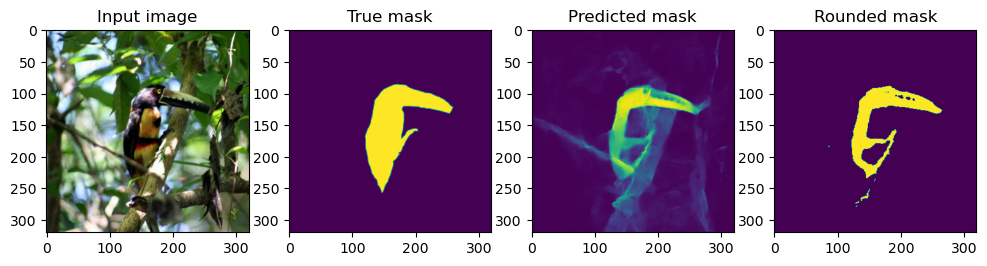

2003/2003 [==============================] - 1063s 529ms/step - loss: 1.1727 - activation_loss: 0.1527 - activation_1_loss: 0.1534 - activation_2_loss: 0.1558 - activation_3_loss: 0.1586 - activation_4_loss: 0.1647 - activation_5_loss: 0.1810 - activation_6_loss: 0.2065 - activation_accuracy: 0.9141 - activation_mean_squared_error: 0.0433 - activation_rounded_mean_io_u: 0.8282 - activation_precision: 0.8991 - activation_recall: 0.8199 - val_loss: 1.4596 - val_activation_loss: 0.2046 - val_activation_1_loss: 0.2117 - val_activation_2_loss: 0.2043 - val_activation_3_loss: 0.2021 - val_activation_4_loss: 0.2022 - val_activation_5_loss: 0.2083 - val_activation_6_loss: 0.2264 - val_activation_accuracy: 0.8925 - val_activation_mean_squared_error: 0.0604 - val_activation_rounded_mean_io_u: 0.7154 - val_activation_precision: 0.7128 - val_activation_recall: 0.7150
Epoch 12/100
2003/2003 [==============================] - ETA: 0s - loss: 1.1371 - activation_loss: 0.1477 - activation_1_loss: 0.14

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1108s 552ms/step - loss: 1.1371 - activation_loss: 0.1477 - activation_1_loss: 0.1482 - activation_2_loss: 0.1505 - activation_3_loss: 0.1532 - activation_4_loss: 0.1594 - activation_5_loss: 0.1761 - activation_6_loss: 0.2020 - activation_accuracy: 0.9162 - activation_mean_squared_error: 0.0417 - activation_rounded_mean_io_u: 0.8330 - activation_precision: 0.9030 - activation_recall: 0.8248 - val_loss: 1.4222 - val_activation_loss: 0.1943 - val_activation_1_loss: 0.1967 - val_activation_2_loss: 0.1962 - val_activation_3_loss: 0.1979 - val_activation_4_loss: 0.2003 - val_activation_5_loss: 0.2091 - val_activation_6_loss: 0.2277 - val_activation_accuracy: 0.8996 - val_activation_mean_squared_error: 0.0562 - val_activation_rounded_mean_io_u: 0.7219 - val_activation_precision: 0.7724 - val_activation_recall: 0.6555
Epoch 13/100
2003/2003 [==============================] - ETA: 0s - loss: 1.1089 - activation_loss: 0.1433 - activation_1_loss: 0.14

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1107s 551ms/step - loss: 1.1089 - activation_loss: 0.1433 - activation_1_loss: 0.1439 - activation_2_loss: 0.1462 - activation_3_loss: 0.1491 - activation_4_loss: 0.1553 - activation_5_loss: 0.1723 - activation_6_loss: 0.1987 - activation_accuracy: 0.9176 - activation_mean_squared_error: 0.0405 - activation_rounded_mean_io_u: 0.8362 - activation_precision: 0.9056 - activation_recall: 0.8281 - val_loss: 1.3498 - val_activation_loss: 0.1844 - val_activation_1_loss: 0.1878 - val_activation_2_loss: 0.1857 - val_activation_3_loss: 0.1858 - val_activation_4_loss: 0.1895 - val_activation_5_loss: 0.1991 - val_activation_6_loss: 0.2174 - val_activation_accuracy: 0.9008 - val_activation_mean_squared_error: 0.0542 - val_activation_rounded_mean_io_u: 0.7273 - val_activation_precision: 0.7671 - val_activation_recall: 0.6802
Epoch 14/100
2003/2003 [==============================] - ETA: 0s - loss: 1.0745 - activation_loss: 0.1381 - activation_1_loss: 0.13

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1110s 552ms/step - loss: 1.0745 - activation_loss: 0.1381 - activation_1_loss: 0.1387 - activation_2_loss: 0.1410 - activation_3_loss: 0.1440 - activation_4_loss: 0.1505 - activation_5_loss: 0.1676 - activation_6_loss: 0.1946 - activation_accuracy: 0.9198 - activation_mean_squared_error: 0.0389 - activation_rounded_mean_io_u: 0.8411 - activation_precision: 0.9095 - activation_recall: 0.8332 - val_loss: 1.3589 - val_activation_loss: 0.1857 - val_activation_1_loss: 0.1874 - val_activation_2_loss: 0.1889 - val_activation_3_loss: 0.1900 - val_activation_4_loss: 0.1899 - val_activation_5_loss: 0.2000 - val_activation_6_loss: 0.2170 - val_activation_accuracy: 0.9041 - val_activation_mean_squared_error: 0.0533 - val_activation_rounded_mean_io_u: 0.7285 - val_activation_precision: 0.8163 - val_activation_recall: 0.6245
Epoch 15/100
2003/2003 [==============================] - 1062s 528ms/step - loss: 1.0568 - activation_loss: 0.1354 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1106s 551ms/step - loss: 1.0070 - activation_loss: 0.1278 - activation_1_loss: 0.1281 - activation_2_loss: 0.1305 - activation_3_loss: 0.1339 - activation_4_loss: 0.1406 - activation_5_loss: 0.1588 - activation_6_loss: 0.1874 - activation_accuracy: 0.9239 - activation_mean_squared_error: 0.0357 - activation_rounded_mean_io_u: 0.8506 - activation_precision: 0.9167 - activation_recall: 0.8427 - val_loss: 1.3230 - val_activation_loss: 0.1818 - val_activation_1_loss: 0.1844 - val_activation_2_loss: 0.1827 - val_activation_3_loss: 0.1825 - val_activation_4_loss: 0.1878 - val_activation_5_loss: 0.1950 - val_activation_6_loss: 0.2089 - val_activation_accuracy: 0.9050 - val_activation_mean_squared_error: 0.0522 - val_activation_rounded_mean_io_u: 0.7454 - val_activation_precision: 0.7541 - val_activation_recall: 0.7517
Epoch 18/100
2003/2003 [==============================] - ETA: 0s - loss: 0.9771 - activation_loss: 0.1235 - activation_1_loss: 0.12

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1111s 553ms/step - loss: 0.9771 - activation_loss: 0.1235 - activation_1_loss: 0.1239 - activation_2_loss: 0.1262 - activation_3_loss: 0.1295 - activation_4_loss: 0.1362 - activation_5_loss: 0.1544 - activation_6_loss: 0.1833 - activation_accuracy: 0.9258 - activation_mean_squared_error: 0.0343 - activation_rounded_mean_io_u: 0.8552 - activation_precision: 0.9196 - activation_recall: 0.8478 - val_loss: 1.3219 - val_activation_loss: 0.1815 - val_activation_1_loss: 0.1832 - val_activation_2_loss: 0.1835 - val_activation_3_loss: 0.1841 - val_activation_4_loss: 0.1852 - val_activation_5_loss: 0.1933 - val_activation_6_loss: 0.2111 - val_activation_accuracy: 0.9053 - val_activation_mean_squared_error: 0.0520 - val_activation_rounded_mean_io_u: 0.7412 - val_activation_precision: 0.7794 - val_activation_recall: 0.6959
Epoch 19/100
2003/2003 [==============================] - ETA: 0s - loss: 0.9604 - activation_loss: 0.1211 - activation_1_loss: 0.12

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1107s 551ms/step - loss: 0.9604 - activation_loss: 0.1211 - activation_1_loss: 0.1215 - activation_2_loss: 0.1237 - activation_3_loss: 0.1270 - activation_4_loss: 0.1338 - activation_5_loss: 0.1522 - activation_6_loss: 0.1812 - activation_accuracy: 0.9266 - activation_mean_squared_error: 0.0336 - activation_rounded_mean_io_u: 0.8571 - activation_precision: 0.9208 - activation_recall: 0.8500 - val_loss: 1.3060 - val_activation_loss: 0.1788 - val_activation_1_loss: 0.1851 - val_activation_2_loss: 0.1816 - val_activation_3_loss: 0.1808 - val_activation_4_loss: 0.1808 - val_activation_5_loss: 0.1904 - val_activation_6_loss: 0.2085 - val_activation_accuracy: 0.9064 - val_activation_mean_squared_error: 0.0513 - val_activation_rounded_mean_io_u: 0.7449 - val_activation_precision: 0.7759 - val_activation_recall: 0.7178
Epoch 20/100
2003/2003 [==============================] - 1062s 528ms/step - loss: 0.9419 - activation_loss: 0.1182 - activation_1_l

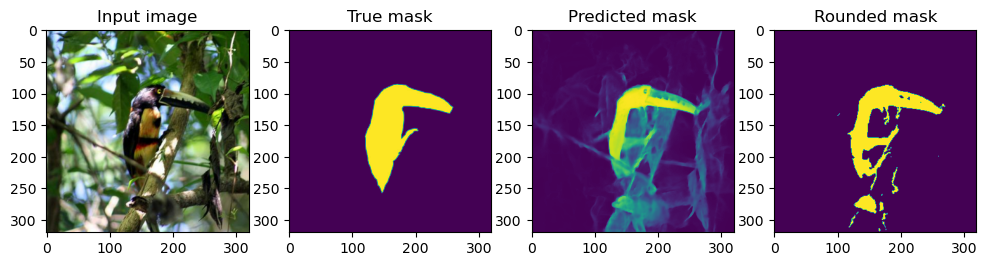

2003/2003 [==============================] - 1063s 529ms/step - loss: 0.9191 - activation_loss: 0.1147 - activation_1_loss: 0.1150 - activation_2_loss: 0.1173 - activation_3_loss: 0.1207 - activation_4_loss: 0.1278 - activation_5_loss: 0.1467 - activation_6_loss: 0.1769 - activation_accuracy: 0.9293 - activation_mean_squared_error: 0.0317 - activation_rounded_mean_io_u: 0.8632 - activation_precision: 0.9261 - activation_recall: 0.8554 - val_loss: 1.4285 - val_activation_loss: 0.1969 - val_activation_1_loss: 0.1984 - val_activation_2_loss: 0.2033 - val_activation_3_loss: 0.2047 - val_activation_4_loss: 0.2045 - val_activation_5_loss: 0.2041 - val_activation_6_loss: 0.2166 - val_activation_accuracy: 0.8982 - val_activation_mean_squared_error: 0.0570 - val_activation_rounded_mean_io_u: 0.7368 - val_activation_precision: 0.7067 - val_activation_recall: 0.8135
Epoch 22/100
2003/2003 [==============================] - 1064s 529ms/step - loss: 0.9033 - activation_loss: 0.1121 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1101s 548ms/step - loss: 0.8584 - activation_loss: 0.1057 - activation_1_loss: 0.1060 - activation_2_loss: 0.1083 - activation_3_loss: 0.1118 - activation_4_loss: 0.1191 - activation_5_loss: 0.1383 - activation_6_loss: 0.1691 - activation_accuracy: 0.9326 - activation_mean_squared_error: 0.0291 - activation_rounded_mean_io_u: 0.8709 - activation_precision: 0.9329 - activation_recall: 0.8618 - val_loss: 1.2935 - val_activation_loss: 0.1759 - val_activation_1_loss: 0.1771 - val_activation_2_loss: 0.1767 - val_activation_3_loss: 0.1801 - val_activation_4_loss: 0.1839 - val_activation_5_loss: 0.1920 - val_activation_6_loss: 0.2078 - val_activation_accuracy: 0.9092 - val_activation_mean_squared_error: 0.0494 - val_activation_rounded_mean_io_u: 0.7556 - val_activation_precision: 0.7748 - val_activation_recall: 0.7449
Epoch 25/100
2003/2003 [==============================] - 1061s 528ms/step - loss: 0.8466 - activation_loss: 0.1038 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1110s 552ms/step - loss: 0.8269 - activation_loss: 0.1009 - activation_1_loss: 0.1012 - activation_2_loss: 0.1034 - activation_3_loss: 0.1070 - activation_4_loss: 0.1145 - activation_5_loss: 0.1341 - activation_6_loss: 0.1658 - activation_accuracy: 0.9347 - activation_mean_squared_error: 0.0275 - activation_rounded_mean_io_u: 0.8759 - activation_precision: 0.9366 - activation_recall: 0.8668 - val_loss: 1.2227 - val_activation_loss: 0.1661 - val_activation_1_loss: 0.1674 - val_activation_2_loss: 0.1663 - val_activation_3_loss: 0.1685 - val_activation_4_loss: 0.1720 - val_activation_5_loss: 0.1827 - val_activation_6_loss: 0.1996 - val_activation_accuracy: 0.9139 - val_activation_mean_squared_error: 0.0461 - val_activation_rounded_mean_io_u: 0.7665 - val_activation_precision: 0.8068 - val_activation_recall: 0.7221
Epoch 27/100
2003/2003 [==============================] - 1065s 530ms/step - loss: 0.8189 - activation_loss: 0.0997 - activation_1_l

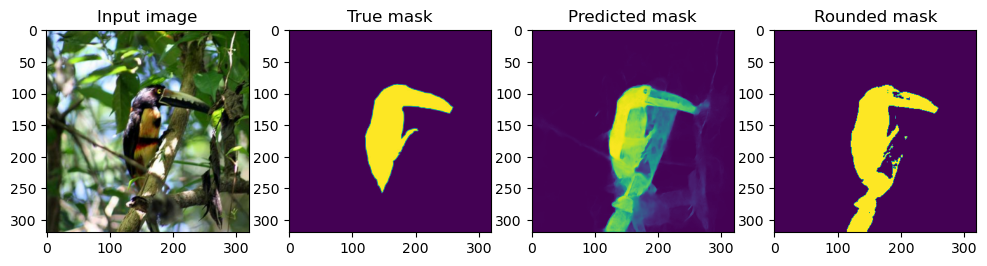

2003/2003 [==============================] - 1060s 527ms/step - loss: 0.7647 - activation_loss: 0.0915 - activation_1_loss: 0.0916 - activation_2_loss: 0.0939 - activation_3_loss: 0.0978 - activation_4_loss: 0.1054 - activation_5_loss: 0.1255 - activation_6_loss: 0.1590 - activation_accuracy: 0.9382 - activation_mean_squared_error: 0.0247 - activation_rounded_mean_io_u: 0.8843 - activation_precision: 0.9431 - activation_recall: 0.8745 - val_loss: 1.3137 - val_activation_loss: 0.1765 - val_activation_1_loss: 0.1771 - val_activation_2_loss: 0.1807 - val_activation_3_loss: 0.1848 - val_activation_4_loss: 0.1857 - val_activation_5_loss: 0.1961 - val_activation_6_loss: 0.2129 - val_activation_accuracy: 0.9106 - val_activation_mean_squared_error: 0.0488 - val_activation_rounded_mean_io_u: 0.7606 - val_activation_precision: 0.7697 - val_activation_recall: 0.7743
Epoch 32/100
2003/2003 [==============================] - 1058s 527ms/step - loss: 0.7376 - activation_loss: 0.0872 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1110s 552ms/step - loss: 0.6996 - activation_loss: 0.0817 - activation_1_loss: 0.0818 - activation_2_loss: 0.0841 - activation_3_loss: 0.0882 - activation_4_loss: 0.0961 - activation_5_loss: 0.1168 - activation_6_loss: 0.1508 - activation_accuracy: 0.9418 - activation_mean_squared_error: 0.0219 - activation_rounded_mean_io_u: 0.8929 - activation_precision: 0.9497 - activation_recall: 0.8825 - val_loss: 1.2917 - val_activation_loss: 0.1768 - val_activation_1_loss: 0.1784 - val_activation_2_loss: 0.1760 - val_activation_3_loss: 0.1815 - val_activation_4_loss: 0.1834 - val_activation_5_loss: 0.1898 - val_activation_6_loss: 0.2058 - val_activation_accuracy: 0.9164 - val_activation_mean_squared_error: 0.0457 - val_activation_rounded_mean_io_u: 0.7675 - val_activation_precision: 0.8421 - val_activation_recall: 0.6927
Epoch 37/100
2003/2003 [==============================] - 1063s 529ms/step - loss: 0.6802 - activation_loss: 0.0786 - activation_1_l

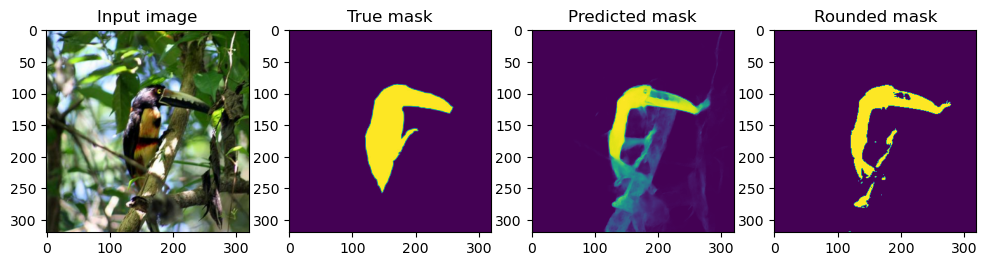

2003/2003 [==============================] - 1063s 529ms/step - loss: 0.6457 - activation_loss: 0.0735 - activation_1_loss: 0.0736 - activation_2_loss: 0.0759 - activation_3_loss: 0.0801 - activation_4_loss: 0.0883 - activation_5_loss: 0.1095 - activation_6_loss: 0.1448 - activation_accuracy: 0.9449 - activation_mean_squared_error: 0.0194 - activation_rounded_mean_io_u: 0.9004 - activation_precision: 0.9562 - activation_recall: 0.8888 - val_loss: 1.3126 - val_activation_loss: 0.1858 - val_activation_1_loss: 0.1867 - val_activation_2_loss: 0.1842 - val_activation_3_loss: 0.1845 - val_activation_4_loss: 0.1841 - val_activation_5_loss: 0.1867 - val_activation_6_loss: 0.2006 - val_activation_accuracy: 0.9160 - val_activation_mean_squared_error: 0.0466 - val_activation_rounded_mean_io_u: 0.7725 - val_activation_precision: 0.8061 - val_activation_recall: 0.7474
Epoch 42/100
2003/2003 [==============================] - 1060s 527ms/step - loss: 0.6483 - activation_loss: 0.0739 - activation_1_l

2003/2003 [==============================] - 1062s 528ms/step - loss: 0.5915 - activation_loss: 0.0653 - activation_1_loss: 0.0654 - activation_2_loss: 0.0677 - activation_3_loss: 0.0720 - activation_4_loss: 0.0807 - activation_5_loss: 0.1023 - activation_6_loss: 0.1381 - activation_accuracy: 0.9481 - activation_mean_squared_error: 0.0170 - activation_rounded_mean_io_u: 0.9081 - activation_precision: 0.9616 - activation_recall: 0.8961 - val_loss: 1.4137 - val_activation_loss: 0.2067 - val_activation_1_loss: 0.2055 - val_activation_2_loss: 0.2038 - val_activation_3_loss: 0.1991 - val_activation_4_loss: 0.1947 - val_activation_5_loss: 0.1944 - val_activation_6_loss: 0.2096 - val_activation_accuracy: 0.9114 - val_activation_mean_squared_error: 0.0505 - val_activation_rounded_mean_io_u: 0.7641 - val_activation_precision: 0.7749 - val_activation_recall: 0.7607
Epoch 51/100
2003/2003 [==============================] - ETA: 0s - loss: 0.5729 - activation_loss: 0.0625 - activation_1_loss: 0.06

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 51



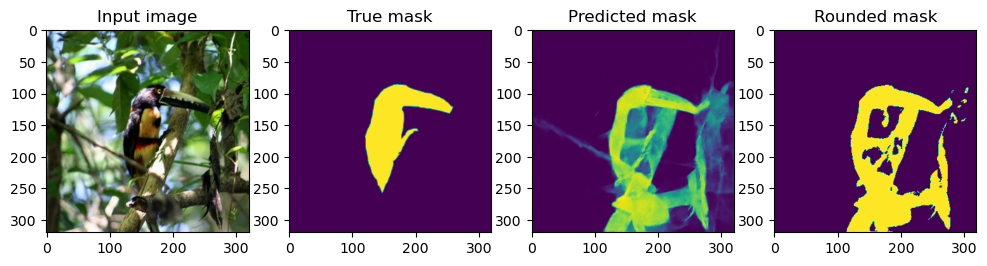

2003/2003 [==============================] - 1107s 551ms/step - loss: 0.5729 - activation_loss: 0.0625 - activation_1_loss: 0.0626 - activation_2_loss: 0.0649 - activation_3_loss: 0.0693 - activation_4_loss: 0.0779 - activation_5_loss: 0.0995 - activation_6_loss: 0.1363 - activation_accuracy: 0.9492 - activation_mean_squared_error: 0.0162 - activation_rounded_mean_io_u: 0.9107 - activation_precision: 0.9634 - activation_recall: 0.8986 - val_loss: 1.3020 - val_activation_loss: 0.1811 - val_activation_1_loss: 0.1820 - val_activation_2_loss: 0.1840 - val_activation_3_loss: 0.1878 - val_activation_4_loss: 0.1876 - val_activation_5_loss: 0.1835 - val_activation_6_loss: 0.1961 - val_activation_accuracy: 0.9176 - val_activation_mean_squared_error: 0.0450 - val_activation_rounded_mean_io_u: 0.7784 - val_activation_precision: 0.8021 - val_activation_recall: 0.7705
Epoch 52/100
2003/2003 [==============================] - 1064s 530ms/step - loss: 0.5694 - activation_loss: 0.0620 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1107s 551ms/step - loss: 0.5247 - activation_loss: 0.0553 - activation_1_loss: 0.0554 - activation_2_loss: 0.0577 - activation_3_loss: 0.0622 - activation_4_loss: 0.0712 - activation_5_loss: 0.0931 - activation_6_loss: 0.1296 - activation_accuracy: 0.9519 - activation_mean_squared_error: 0.0141 - activation_rounded_mean_io_u: 0.9176 - activation_precision: 0.9691 - activation_recall: 0.9038 - val_loss: 1.3606 - val_activation_loss: 0.1981 - val_activation_1_loss: 0.1979 - val_activation_2_loss: 0.1969 - val_activation_3_loss: 0.1953 - val_activation_4_loss: 0.1917 - val_activation_5_loss: 0.1861 - val_activation_6_loss: 0.1946 - val_activation_accuracy: 0.9205 - val_activation_mean_squared_error: 0.0445 - val_activation_rounded_mean_io_u: 0.7848 - val_activation_precision: 0.8227 - val_activation_recall: 0.7586
Epoch 60/100
2003/2003 [==============================] - 1066s 530ms/step - loss: 0.5240 - activation_loss: 0.0555 - activation_1_l

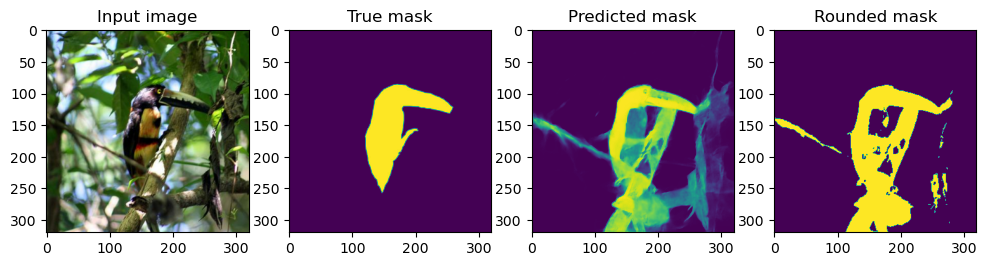

2003/2003 [==============================] - 1066s 530ms/step - loss: 0.5326 - activation_loss: 0.0563 - activation_1_loss: 0.0563 - activation_2_loss: 0.0587 - activation_3_loss: 0.0632 - activation_4_loss: 0.0722 - activation_5_loss: 0.0944 - activation_6_loss: 0.1315 - activation_accuracy: 0.9515 - activation_mean_squared_error: 0.0144 - activation_rounded_mean_io_u: 0.9167 - activation_precision: 0.9682 - activation_recall: 0.9032 - val_loss: 1.4335 - val_activation_loss: 0.2057 - val_activation_1_loss: 0.2063 - val_activation_2_loss: 0.2099 - val_activation_3_loss: 0.2075 - val_activation_4_loss: 0.2022 - val_activation_5_loss: 0.1983 - val_activation_6_loss: 0.2037 - val_activation_accuracy: 0.9104 - val_activation_mean_squared_error: 0.0507 - val_activation_rounded_mean_io_u: 0.7650 - val_activation_precision: 0.7506 - val_activation_recall: 0.8162
Epoch 62/100
2003/2003 [==============================] - 1063s 529ms/step - loss: 0.5055 - activation_loss: 0.0527 - activation_1_l

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


2003/2003 [==============================] - 1110s 552ms/step - loss: 0.5091 - activation_loss: 0.0529 - activation_1_loss: 0.0529 - activation_2_loss: 0.0553 - activation_3_loss: 0.0598 - activation_4_loss: 0.0690 - activation_5_loss: 0.0909 - activation_6_loss: 0.1282 - activation_accuracy: 0.9527 - activation_mean_squared_error: 0.0134 - activation_rounded_mean_io_u: 0.9197 - activation_precision: 0.9711 - activation_recall: 0.9052 - val_loss: 1.3704 - val_activation_loss: 0.1939 - val_activation_1_loss: 0.1944 - val_activation_2_loss: 0.1934 - val_activation_3_loss: 0.1940 - val_activation_4_loss: 0.1937 - val_activation_5_loss: 0.1947 - val_activation_6_loss: 0.2064 - val_activation_accuracy: 0.9199 - val_activation_mean_squared_error: 0.0444 - val_activation_rounded_mean_io_u: 0.7849 - val_activation_precision: 0.8164 - val_activation_recall: 0.7599
Epoch 67/100
2003/2003 [==============================] - 1064s 529ms/step - loss: 0.5056 - activation_loss: 0.0524 - activation_1_l

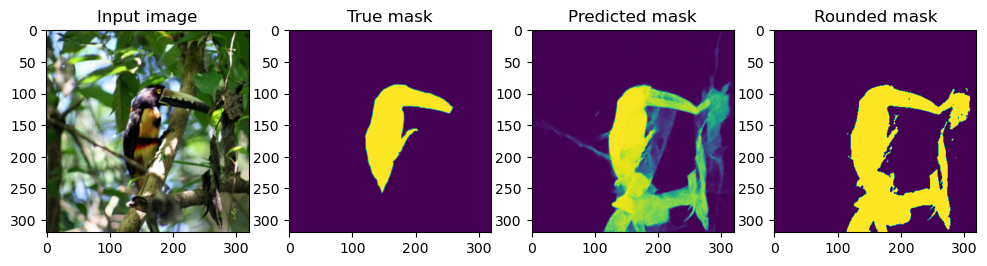

2003/2003 [==============================] - 1064s 530ms/step - loss: 0.4756 - activation_loss: 0.0482 - activation_1_loss: 0.0482 - activation_2_loss: 0.0507 - activation_3_loss: 0.0551 - activation_4_loss: 0.0642 - activation_5_loss: 0.0861 - activation_6_loss: 0.1231 - activation_accuracy: 0.9544 - activation_mean_squared_error: 0.0120 - activation_rounded_mean_io_u: 0.9238 - activation_precision: 0.9742 - activation_recall: 0.9090 - val_loss: 1.4713 - val_activation_loss: 0.2122 - val_activation_1_loss: 0.2100 - val_activation_2_loss: 0.2118 - val_activation_3_loss: 0.2147 - val_activation_4_loss: 0.2092 - val_activation_5_loss: 0.2022 - val_activation_6_loss: 0.2110 - val_activation_accuracy: 0.9190 - val_activation_mean_squared_error: 0.0458 - val_activation_rounded_mean_io_u: 0.7824 - val_activation_precision: 0.8003 - val_activation_recall: 0.7896
Epoch 72/100
2003/2003 [==============================] - 1062s 529ms/step - loss: 0.4816 - activation_loss: 0.0487 - activation_1_l

2003/2003 [==============================] - 1061s 528ms/step - loss: 0.4643 - activation_loss: 0.0461 - activation_1_loss: 0.0461 - activation_2_loss: 0.0485 - activation_3_loss: 0.0531 - activation_4_loss: 0.0625 - activation_5_loss: 0.0849 - activation_6_loss: 0.1230 - activation_accuracy: 0.9552 - activation_mean_squared_error: 0.0114 - activation_rounded_mean_io_u: 0.9258 - activation_precision: 0.9760 - activation_recall: 0.9102 - val_loss: 1.4854 - val_activation_loss: 0.2137 - val_activation_1_loss: 0.2129 - val_activation_2_loss: 0.2136 - val_activation_3_loss: 0.2141 - val_activation_4_loss: 0.2093 - val_activation_5_loss: 0.2060 - val_activation_6_loss: 0.2157 - val_activation_accuracy: 0.9130 - val_activation_mean_squared_error: 0.0498 - val_activation_rounded_mean_io_u: 0.7693 - val_activation_precision: 0.7674 - val_activation_recall: 0.8022
Epoch 81/100
2003/2003 [==============================] - ETA: 0s - loss: 0.4409 - activation_loss: 0.0431 - activation_1_loss: 0.04

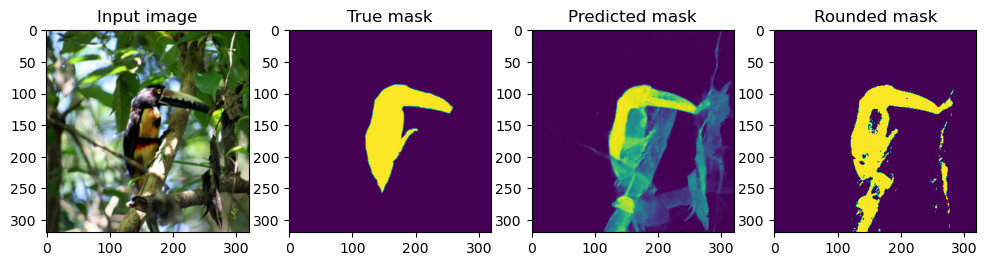

2003/2003 [==============================] - 1066s 530ms/step - loss: 0.4409 - activation_loss: 0.0431 - activation_1_loss: 0.0431 - activation_2_loss: 0.0456 - activation_3_loss: 0.0501 - activation_4_loss: 0.0592 - activation_5_loss: 0.0812 - activation_6_loss: 0.1185 - activation_accuracy: 0.9562 - activation_mean_squared_error: 0.0106 - activation_rounded_mean_io_u: 0.9284 - activation_precision: 0.9778 - activation_recall: 0.9127 - val_loss: 1.4306 - val_activation_loss: 0.2069 - val_activation_1_loss: 0.2071 - val_activation_2_loss: 0.2045 - val_activation_3_loss: 0.2060 - val_activation_4_loss: 0.2011 - val_activation_5_loss: 0.1979 - val_activation_6_loss: 0.2071 - val_activation_accuracy: 0.9182 - val_activation_mean_squared_error: 0.0462 - val_activation_rounded_mean_io_u: 0.7805 - val_activation_precision: 0.8060 - val_activation_recall: 0.7644
Epoch 82/100
2003/2003 [==============================] - 1067s 531ms/step - loss: 0.4459 - activation_loss: 0.0438 - activation_1_l

2003/2003 [==============================] - 1064s 529ms/step - loss: 0.4408 - activation_loss: 0.0429 - activation_1_loss: 0.0429 - activation_2_loss: 0.0453 - activation_3_loss: 0.0499 - activation_4_loss: 0.0594 - activation_5_loss: 0.0815 - activation_6_loss: 0.1191 - activation_accuracy: 0.9563 - activation_mean_squared_error: 0.0105 - activation_rounded_mean_io_u: 0.9285 - activation_precision: 0.9779 - activation_recall: 0.9128 - val_loss: 1.4461 - val_activation_loss: 0.2109 - val_activation_1_loss: 0.2116 - val_activation_2_loss: 0.2072 - val_activation_3_loss: 0.2095 - val_activation_4_loss: 0.2041 - val_activation_5_loss: 0.1965 - val_activation_6_loss: 0.2063 - val_activation_accuracy: 0.9185 - val_activation_mean_squared_error: 0.0460 - val_activation_rounded_mean_io_u: 0.7795 - val_activation_precision: 0.8135 - val_activation_recall: 0.7567
Epoch 91/100
2003/2003 [==============================] - ETA: 0s - loss: 0.4191 - activation_loss: 0.0400 - activation_1_loss: 0.04

INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net\best\assets



Sample Prediction after epoch 91



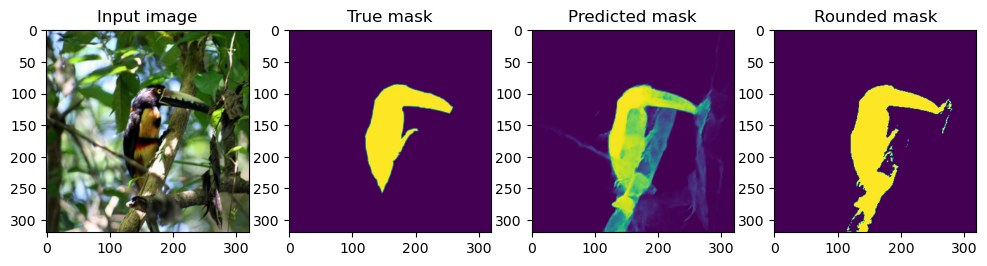

2003/2003 [==============================] - 1110s 552ms/step - loss: 0.4191 - activation_loss: 0.0400 - activation_1_loss: 0.0400 - activation_2_loss: 0.0424 - activation_3_loss: 0.0470 - activation_4_loss: 0.0564 - activation_5_loss: 0.0780 - activation_6_loss: 0.1153 - activation_accuracy: 0.9573 - activation_mean_squared_error: 0.0097 - activation_rounded_mean_io_u: 0.9311 - activation_precision: 0.9798 - activation_recall: 0.9150 - val_loss: 1.4066 - val_activation_loss: 0.1996 - val_activation_1_loss: 0.1987 - val_activation_2_loss: 0.1975 - val_activation_3_loss: 0.1998 - val_activation_4_loss: 0.1982 - val_activation_5_loss: 0.2031 - val_activation_6_loss: 0.2096 - val_activation_accuracy: 0.9233 - val_activation_mean_squared_error: 0.0424 - val_activation_rounded_mean_io_u: 0.7941 - val_activation_precision: 0.8151 - val_activation_recall: 0.8004
Epoch 92/100
2003/2003 [==============================] - 1064s 529ms/step - loss: 0.4236 - activation_loss: 0.0406 - activation_1_l

2003/2003 [==============================] - ETA: 0s - loss: 0.4249 - activation_loss: 0.0404 - activation_1_loss: 0.0404 - activation_2_loss: 0.0429 - activation_3_loss: 0.0476 - activation_4_loss: 0.0572 - activation_5_loss: 0.0792 - activation_6_loss: 0.1172 - activation_accuracy: 0.9572 - activation_mean_squared_error: 0.0098 - activation_rounded_mean_io_u: 0.9309 - activation_precision: 0.9795 - activation_recall: 0.9149
Sample Prediction after epoch 100



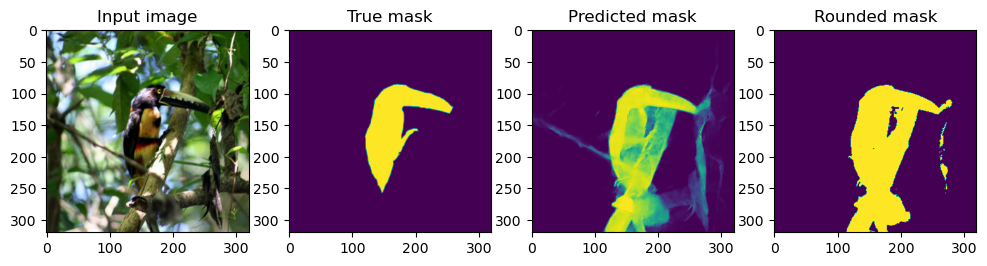

2003/2003 [==============================] - 1067s 531ms/step - loss: 0.4249 - activation_loss: 0.0404 - activation_1_loss: 0.0404 - activation_2_loss: 0.0429 - activation_3_loss: 0.0476 - activation_4_loss: 0.0572 - activation_5_loss: 0.0792 - activation_6_loss: 0.1172 - activation_accuracy: 0.9572 - activation_mean_squared_error: 0.0098 - activation_rounded_mean_io_u: 0.9309 - activation_precision: 0.9795 - activation_recall: 0.9149 - val_loss: 1.5514 - val_activation_loss: 0.2275 - val_activation_1_loss: 0.2261 - val_activation_2_loss: 0.2247 - val_activation_3_loss: 0.2308 - val_activation_4_loss: 0.2228 - val_activation_5_loss: 0.2104 - val_activation_6_loss: 0.2091 - val_activation_accuracy: 0.9165 - val_activation_mean_squared_error: 0.0482 - val_activation_rounded_mean_io_u: 0.7802 - val_activation_precision: 0.7772 - val_activation_recall: 0.8069


INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


INFO:tensorflow:Assets written to: ./saved_models/u2net/latest\assets


In [8]:
callbacks = [
    keras.callbacks.TensorBoard(log_dir="./logs"),
    keras.callbacks.BackupAndRestore("./bkp"),
    keras.callbacks.ModelCheckpoint("./saved_models/u2net/best", monitor="val_activation_mean_squared_error", save_best_only=True),
    DisplayCallback(test_image_for_display, test_mask_for_display, 10, total_epochs=EPOCHS),
]

history = model.fit(train_dataset, validation_data=test_dataset, callbacks=callbacks, epochs=EPOCHS, verbose=1)
model.save('./saved_models/u2net/latest', include_optimizer=False)

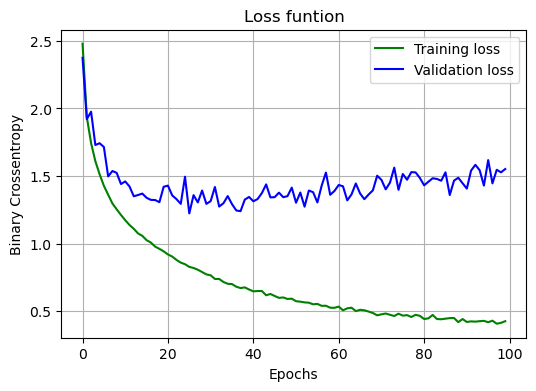

In [9]:
# loss outputs
plt.figure(figsize=(6, 4))
loss = history.history["loss"]
val_loss = history.history['val_loss']
    
plt.plot(history.epoch, loss, 'g', label='Training loss')
plt.plot(history.epoch, val_loss, 'b', label='Validation loss')
plt.title('Loss funtion')
plt.ylabel('Binary Crossentropy')
plt.xlabel('Epochs')
plt.legend()
plt.grid()

plt.show()

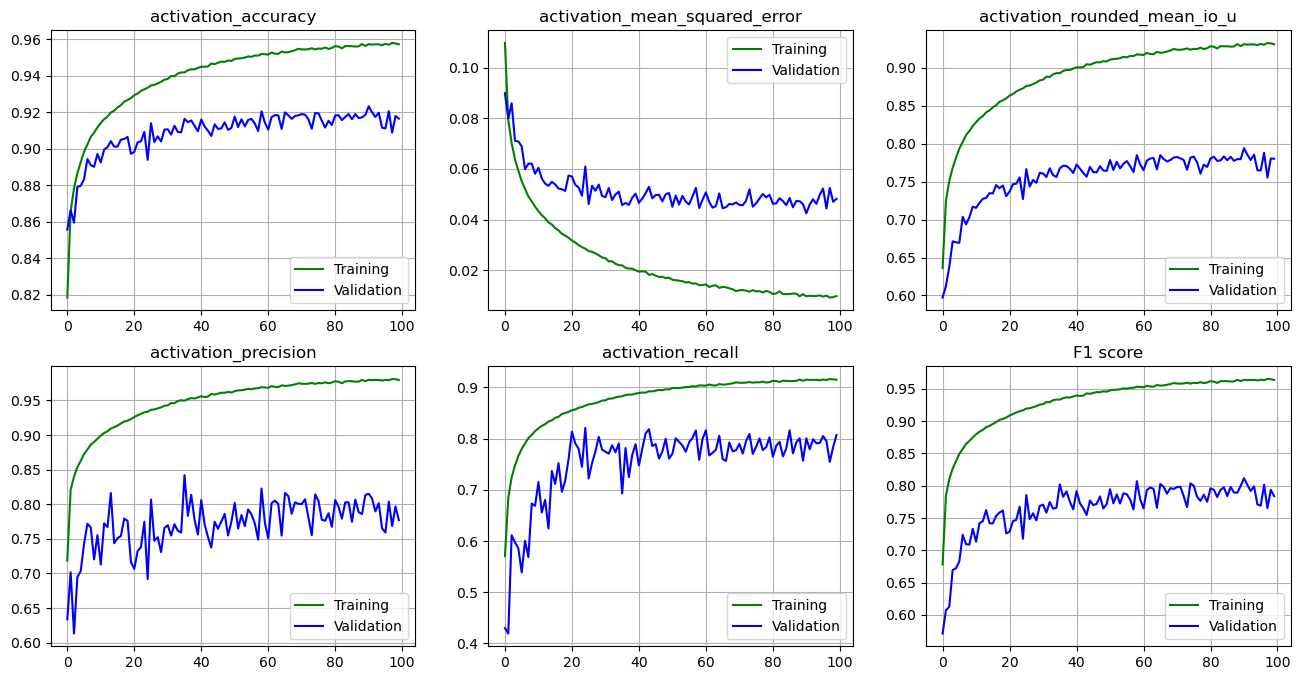

In [10]:
# metrics
metrics_titles_list = [
    "activation_accuracy", 
    "activation_mean_squared_error", 
    "activation_rounded_mean_io_u", 
    "activation_precision", 
    "activation_recall"
]

fig, axs = plt.subplots(2, 3, figsize=(16, 8))
axs = axs.ravel()

for i, metrics_name in enumerate(metrics_titles_list):
    metrics = history.history[metrics_name]
    val_metrics = history.history['val_' + metrics_name]
    
    axs[i].plot(history.epoch, metrics, 'g', label='Training')
    axs[i].plot(history.epoch, val_metrics, 'b', label='Validation')
    axs[i].set_title(metrics_name)
    axs[i].legend()
    axs[i].grid()
    
f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['activation_precision'], history.history['activation_recall'])))
val_f1_scores = list(map(lambda x: FBetaScore(x[0], x[1], 0.3), zip(history.history['val_activation_precision'], history.history['val_activation_recall'])))
axs[5].plot(history.epoch, f1_scores, 'g', label='Training')
axs[5].plot(history.epoch, val_f1_scores, 'b', label='Validation')
axs[5].set_title('F1 score')
axs[5].legend()
axs[5].grid()

plt.show()

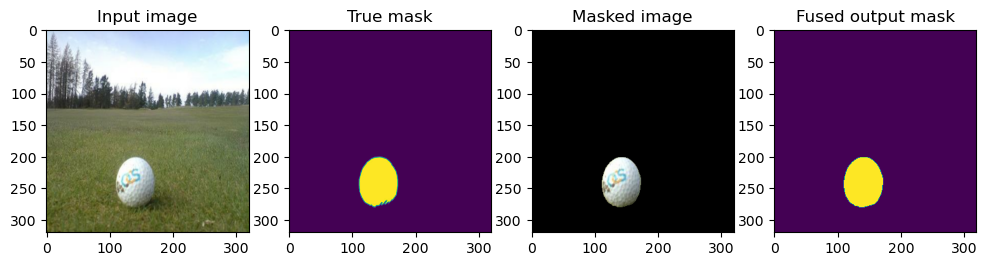

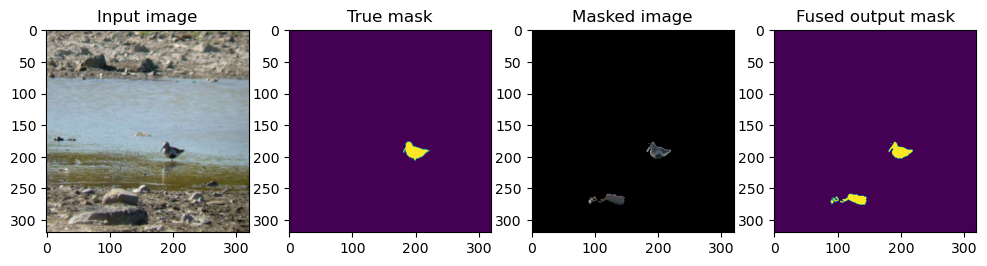

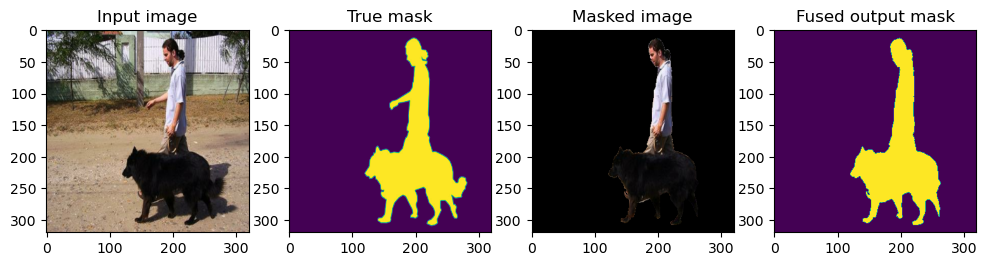

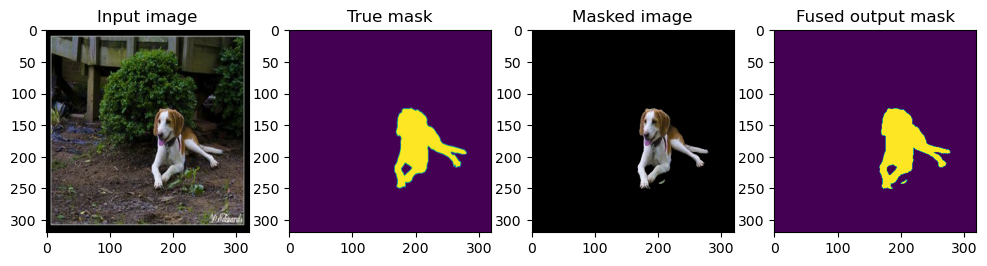

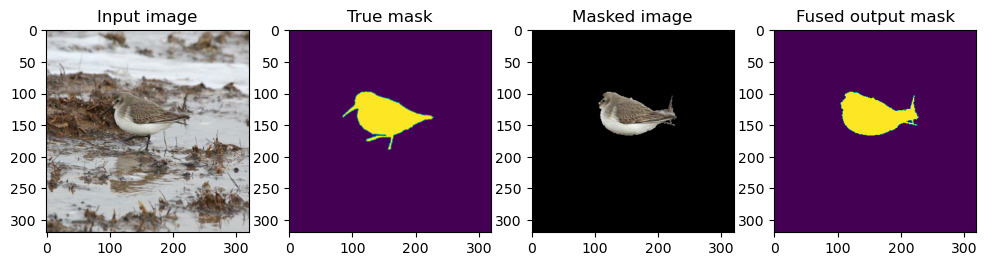

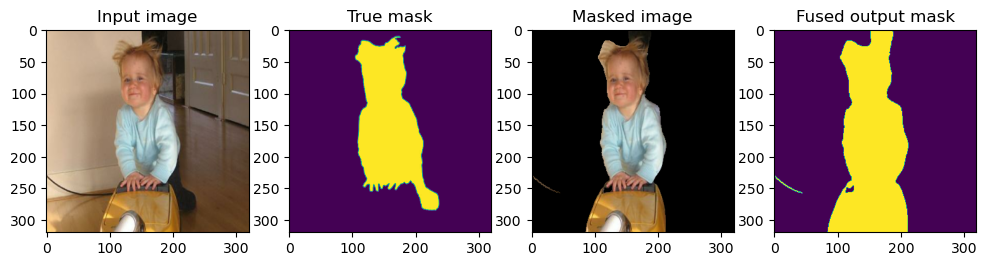

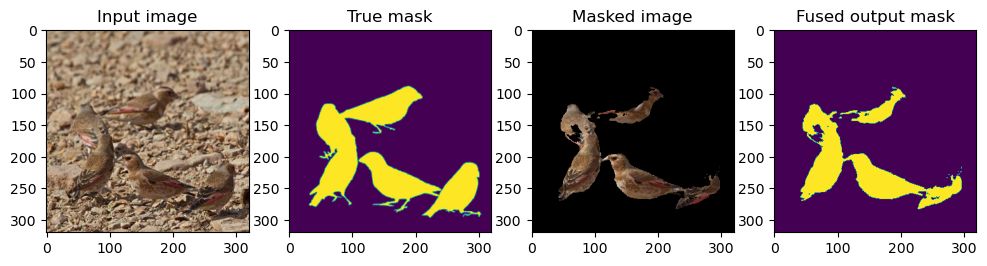

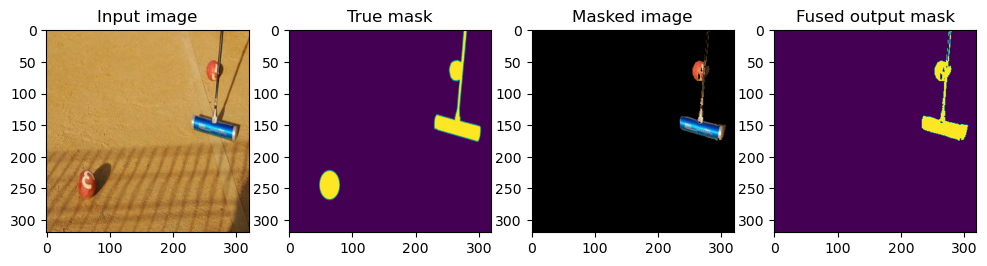

In [14]:
for image, mask in test_dataset.shuffle(80).take(1):
    out = model(image)
    for i in range(len(image)):
        out_mask = tf.math.round(out[0][i])
        display(
            [image[i], mask[i], np.multiply(image[i], out_mask), out_mask],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [15]:
RoundedAccuracy(), MeanSquaredError(), RoundedMeanIoU
saved_model = keras.models.load_model('./saved_models/u2net/best', custom_objects={
    "RoundedAccuracy": RoundedAccuracy,
    "RoundedMeanIoU": RoundedMeanIoU,
})

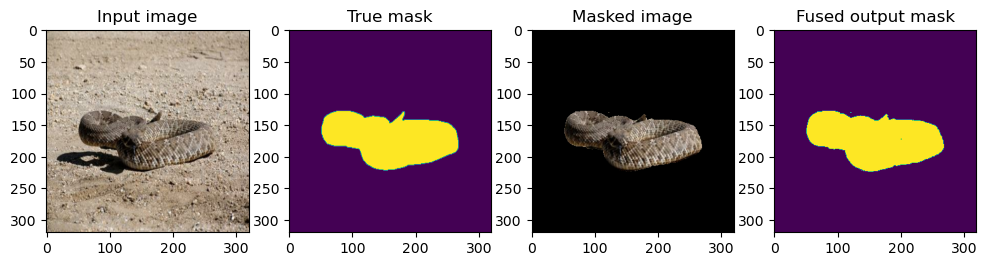

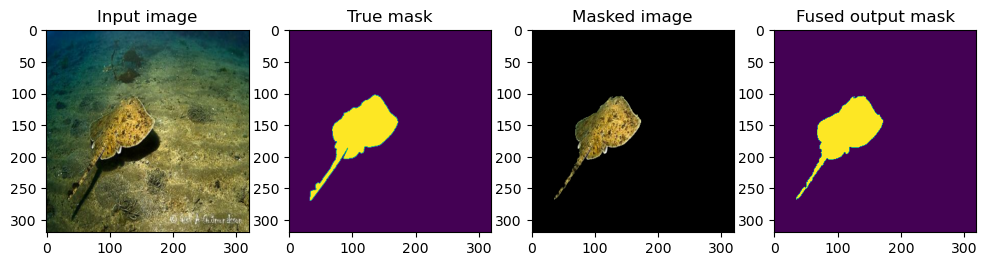

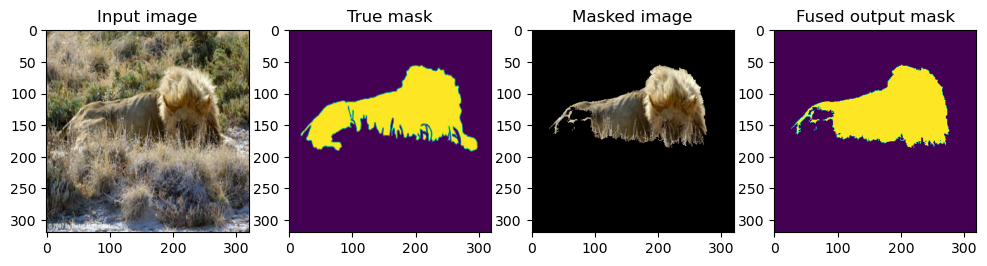

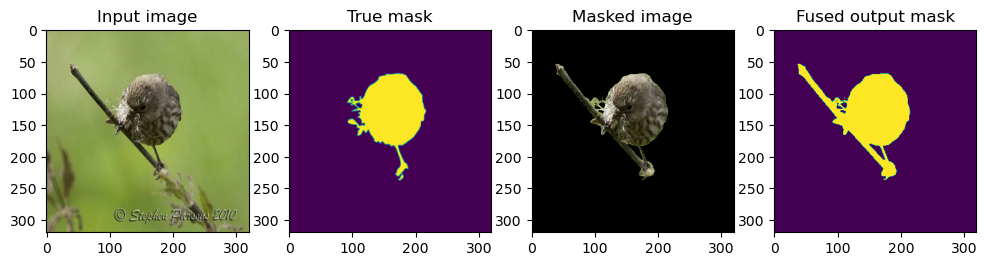

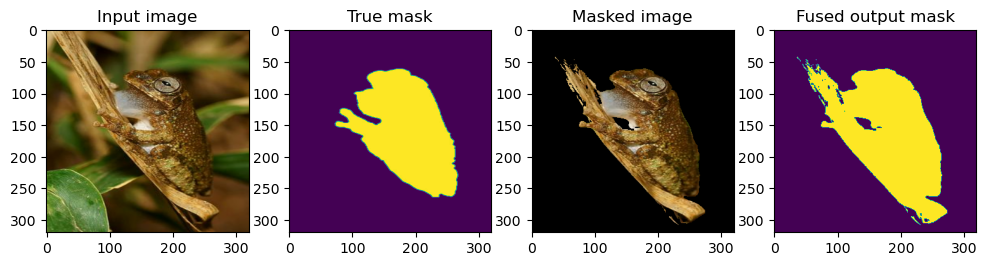

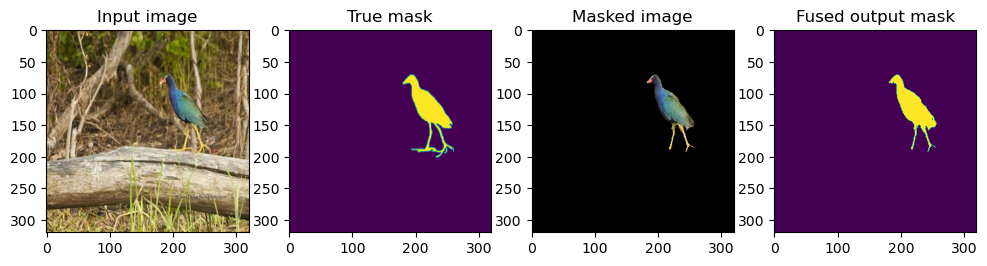

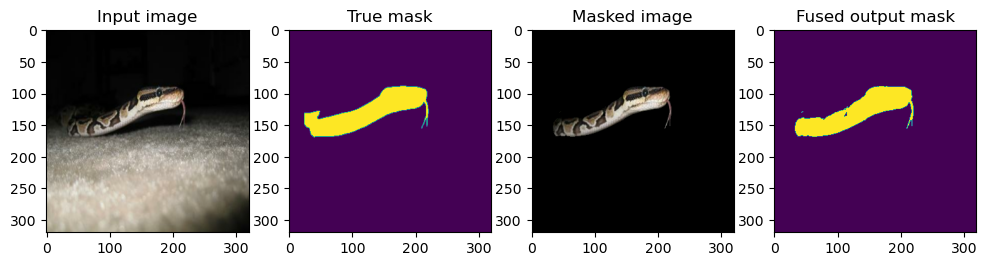

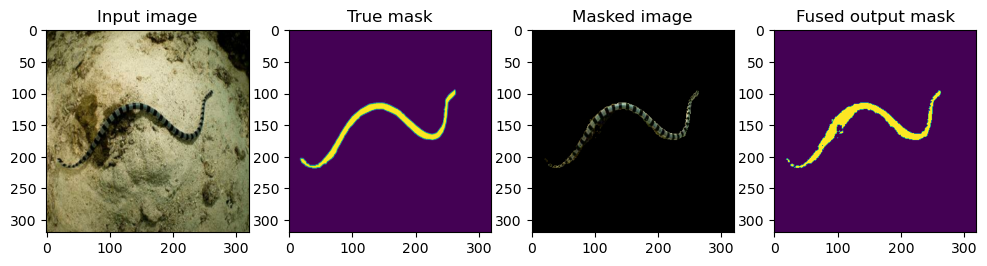

In [20]:
for image, mask in test_dataset.shuffle(80).take(1):
    out = saved_model(image)
    for i in range(len(image)):
        out_mask = tf.math.round(out[0][i])
        display(
            [image[i], mask[i], np.multiply(image[i], out_mask), out_mask],
            ["Input image", "True mask", "Masked image", "Fused output mask"]
        )

In [1]:
%load_ext tensorboard
%tensorboard --logdir ./logs